# Retrieving and Plotting ERA5 Data

In [1]:
import numpy as np

from ddsapi import Client

In [ ]:
dataset = 'era5-single-levels'
request = {
    'product_type': 'reanalysis',
    'variable': ['2_metre_temperature', 'total_precipitation'],
    'area': {'south': 35.0, 'north': 48.0, 'west': 4.0, 'east': 20.0},
    'time': {'start': '2019-01-01T06', 'stop': '2019-01-01T11'},
    'format': 'netcdf'
}

cube = Client(quiet=True).retrieve(dataset, request)

Recovering from HTTP error [504 Gateway Time-out], attemps 0 of 500
Retrying in 120 seconds


In [3]:
temperature = cube['t2m']
temperature

<xarray.Dataset>
Dimensions:    (time: 6, latitude: 53, longitude: 65)
Coordinates:
    crs        int64 1
  * time       (time) datetime64[ns] 2019-01-01T06:00:00 ... 2019-01-01T11:00:00
  * longitude  (longitude) float32 4.0 4.25 4.5 4.75 ... 19.25 19.5 19.75 20.0
  * latitude   (latitude) float32 48.0 47.75 47.5 47.25 ... 35.5 35.25 35.0
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(6, 53, 65), meta=np.ndarray>

In [4]:
rng = np.random.default_rng(seed=0)
n = 10

temperature = temperature.locations(
    latitude=rng.uniform(
        low=temperature.latitude.values.min(),
        high=temperature.latitude.values.max(),
        size=n
    ),
    longitude=rng.uniform(
        low=temperature.longitude.values.min(),
        high=temperature.longitude.values.max(),
        size=n
    )
)
temperature

<xarray.Dataset>
Dimensions:    (time: 6, points: 10)
Coordinates:
    crs        int64 1
  * time       (time) datetime64[ns] 2019-01-01T06:00:00 ... 2019-01-01T11:00:00
    latitude   (points) float32 43.25 38.5 35.5 35.25 ... 43.0 44.5 42.0 47.25
    longitude  (points) float32 17.0 4.0 17.75 4.5 ... 17.75 12.75 8.75 10.75
Dimensions without coordinates: points
Data variables:
    t2m        (time, points) float32 dask.array<chunksize=(6, 10), meta=np.ndarray>

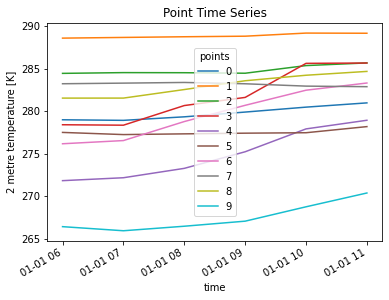

In [5]:
temperature.plot()

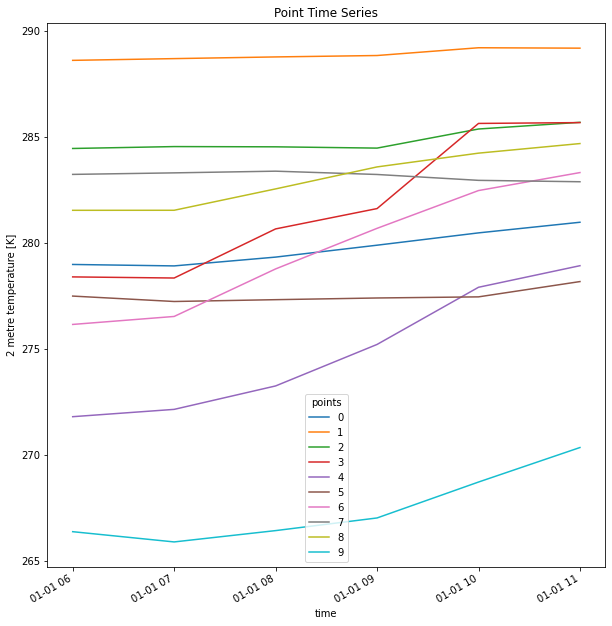

In [6]:
temperature.plot(figsize=(10, 10))

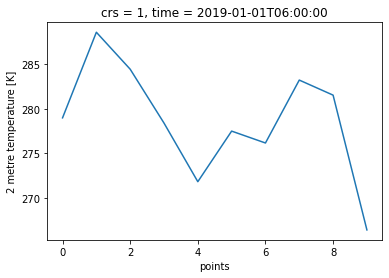

In [7]:
temperature.sel(time='2019-01-01T06').plot()

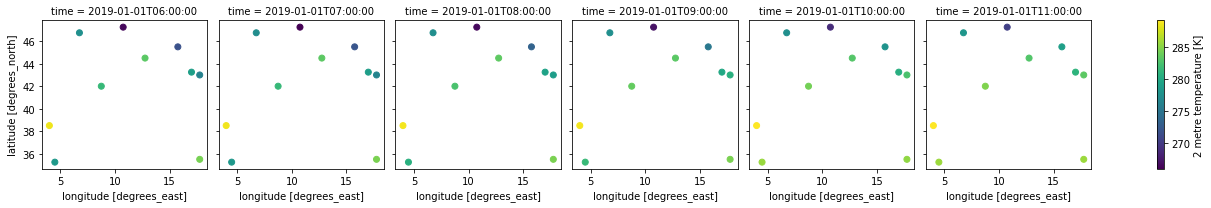

In [8]:
temperature.plot(point_time_series=False)

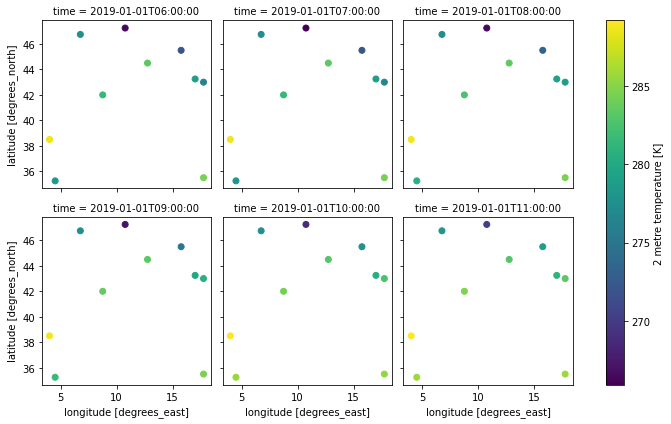

In [9]:
temperature.plot(col_wrap=3, point_time_series=False)

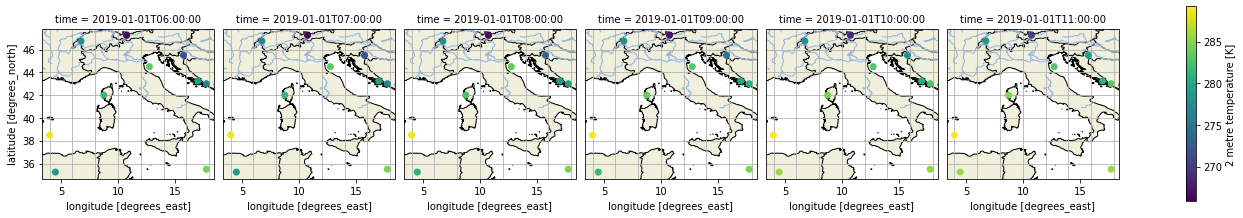

In [10]:
temperature.plot(
    features=('coastline', 'borders', 'lakes', 'rivers', 'land'),
    point_time_series=False
)

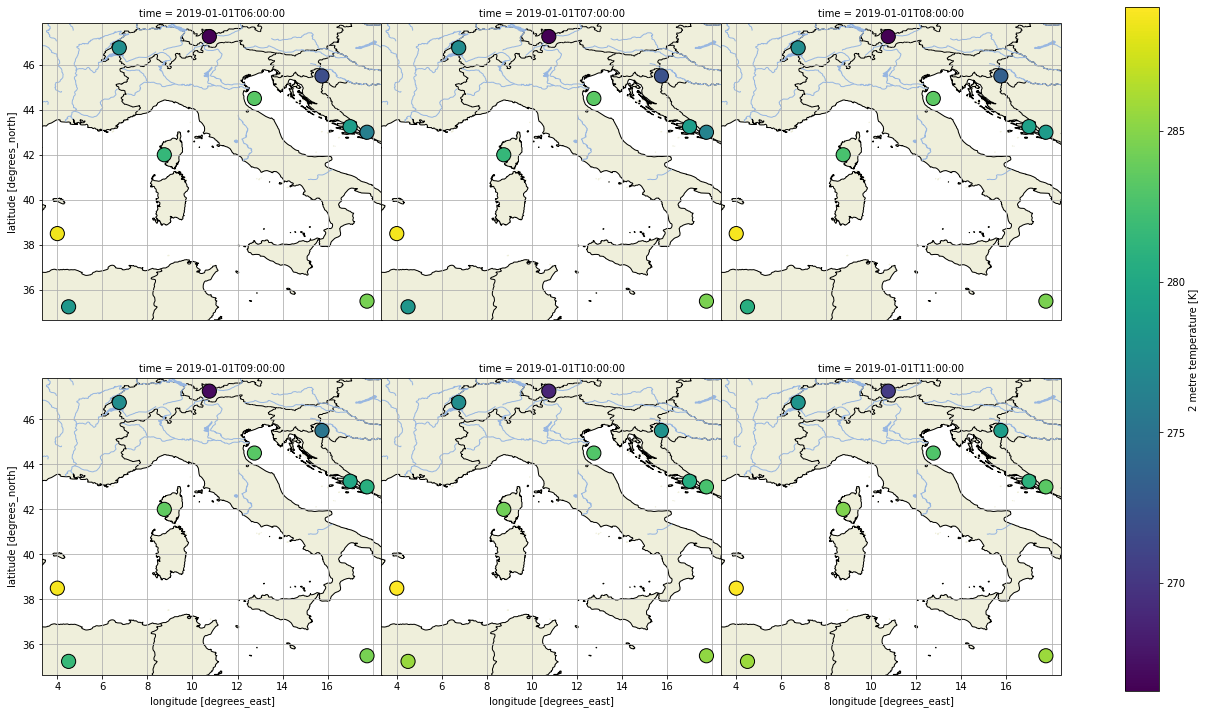

In [11]:
temperature.plot(
    features=('coastline', 'borders', 'lakes', 'rivers', 'land'),
    figsize=(18, 10),
    col_wrap=3,
    s=200,
    edgecolor='black',
    robust=True,
    point_time_series=False
)